<a href="https://colab.research.google.com/github/SalahuddinRahat/my_personal_project/blob/main/ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = fetch_california_housing()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
#devide dependent and independent features
X = dataset
y = df.target
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
## standardizing the datset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor = Ridge()
ridge_regressor

Ridge()

In [46]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,100]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [47]:
print(ridgecv.best_params_)

{'alpha': 5}


In [48]:
print(ridgecv.best_score_)

-0.5268179966861514


In [49]:
ridge_pred1 = ridgecv.predict(X_test)
ridge_pred1

array([0.72799408, 1.76647219, 2.70889662, ..., 2.07364426, 1.57452579,
       1.82666041])

In [50]:
from sklearn.metrics import r2_score

r2_score(y_test,ridge_pred1)

0.5958597389519957

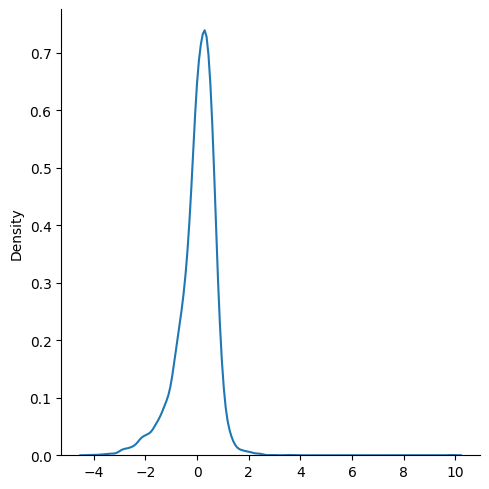

In [51]:
import seaborn as sns
sns.displot(ridge_pred1-y_test,kind = 'kde')